<a href="https://colab.research.google.com/github/agusprasetyo30/uts-data-mining/blob/main/UTS_bu_lely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melakukan Import library

In [9]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Mengambil dan menampilkan data csv sebagai asset data 

In [10]:
test_df = pd.read_csv('titanic_test.csv')
test_label_df = pd.read_csv('titanic_testlabel.csv')
train_df = pd.read_csv('titanic.csv')

train_df.info()
# test_df.info()
# test_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Deskripsi tentang variabel yang digunakan : 
* **survival** : Penumpang yang selamat
* **PassengerId** : Kode uniq yang terdapat pada penumpang.
* **pclass** :    Kelas Tiket  
* **sex** : Gender Penumpag
* **Age**: Usia dalam tahub  
* **sibsp**:    # of siblings / pasangan di kapal Titanic  
* **parch**:    # of parents / anak anak di kapal titanicc   
* **ticket**: Nomer tiker
* **fare**: Tarif Penumpang
* **cabin**: Nomer Kabin     
* **embarked**: Pelabuhan Embarkasi  

   
   




In [15]:
train_df.describe()
# test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


Di atas kita dapat melihat bahwa 38% dari set pelatihan selamat dari Titanic. Kita juga dapat melihat bahwa usia penumpang berkisar antara 0,4 hingga 80. Selain itu, kita juga dapat mendeteksi beberapa fitur yang mengandung nilai yang hilang, seperti fitur ‘Age’ & 'Cabin'.

In [ ]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Dari tabel di atas, kita dapat mencatat beberapa hal. Pertama-tama, **kita perlu mengubah banyak fitur menjadi numerik** nanti, sehingga algoritma pembelajaran mesin dapat memprosesnya. Selanjutnya, kita dapat melihat bahwa **fitur-fitur tersebut memiliki rentang yang sangat berbeda**, yang perlu kita ubah menjadi skala yang kira-kira sama. Kami juga dapat melihat beberapa fitur lagi, yang berisi nilai yang hilang (NaN = bukan angka), yang perlu ditangani.

In [ ]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent_1 = train_df.isnull().sum() / train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

# Menampilkan data 11 fitur pada dataset
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


Fitur **Embarked** hanya memiliki **2** nilai yang hilang, yang dapat dengan mudah diisi. Akan jauh lebih rumit, untuk menangani fitur '**Age**', yang memiliki **177** nilai yang hilang. Fitur '**Cabin**' perlu diselidiki lebih lanjut, tetapi sepertinya kami mungkin ingin menghapusnya dari kumpulan data, karena 77% di antaranya hilang.

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Di atas Anda dapat melihat 11 fitur + variabel target (Survived). Fitur apa yang dapat berkontribusi pada tingkat kelangsungan hidup yang tinggi?

Bagi saya masuk akal jika semuanya kecuali '**PassengerId**', '**Ticket**' dan '**Name**' akan berkorelasi dengan tingkat kelangsungan hidup yang tinggi.

# 1. Age & Sex (Usia dan Gender)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

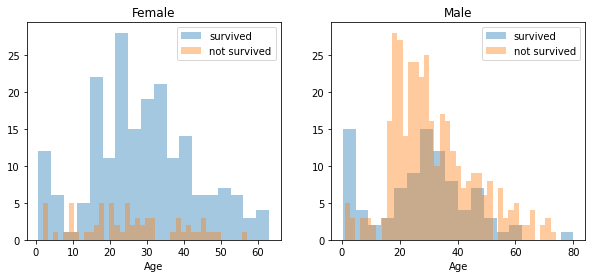

In [11]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Anda dapat melihat bahwa **pria** memiliki k**emungkinan tinggi untuk bertahan hidup** ketika mereka berusia antara **18 dan 30  tahun**, yang juga sedikit benar untuk **wanita** tetapi tidak sepenuhnya. Bagi wanita, peluang **bertahan hidup lebih tinggi antara 14 dan 40.**

Bagi pria, kemungkinan bertahan hidup sangat rendah antara usia 5 dan 18 tahun, tetapi itu tidak berlaku untuk wanita. Hal lain yang perlu diperhatikan adalah bahwa bayi juga memiliki kemungkinan bertahan hidup yang sedikit lebih tinggi.

Karena tampaknya ada usia tertentu, yang telah meningkatkan peluang bertahan hidup dan karena  setiap fitur memiliki skala yang kira-kira sama, saya akan membuat kelompok usia nanti.

# 2. Embarked, Pclass and Sex (Embarkasi, Kelas Tiket & Gender):

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


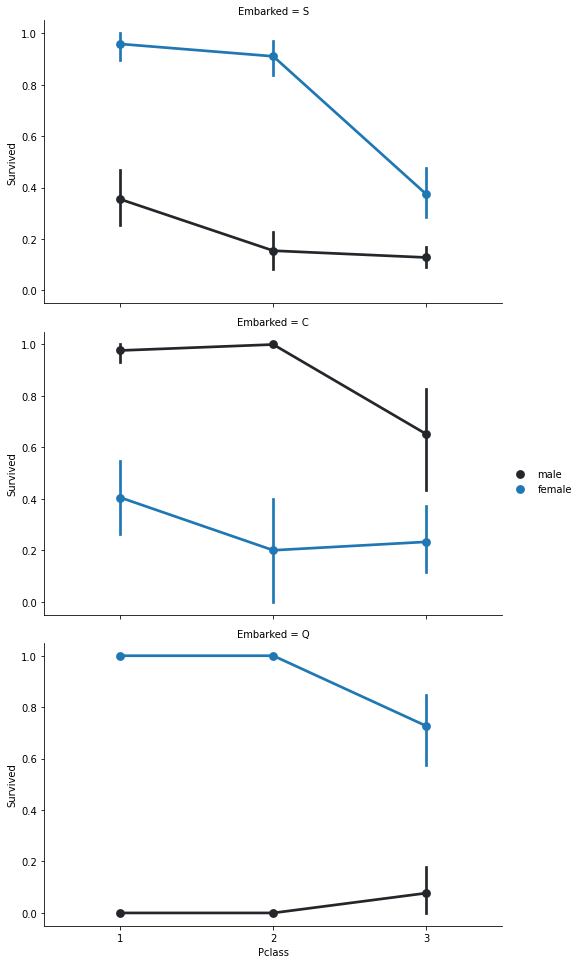

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**Embarked** tampaknya berkorelasi dengan kelangsungan hidup, tergantung pada jenis kelaminnya.

Wanita di port Q dan di port S memiliki peluang lebih tinggi untuk bertahan hidup. Kebalikannya benar, jika mereka berada di port C. Laki-laki memiliki probabilitas bertahan hidup yang tinggi jika mereka berada di port C, tetapi probabilitas rendah jika mereka berada di port Q atau S.

**Pclass** juga tampaknya berkorelasi dengan kelangsungan hidup. Kami akan menghasilkan plot lain di bawah ini.

# 3. Pclass

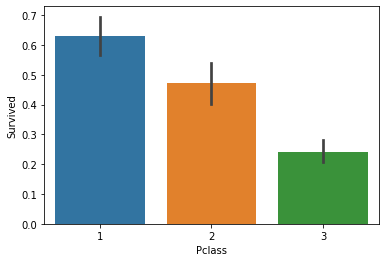

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Di sini kita melihat dengan jelas, bahwa Pclass berkontribusi pada peluang seseorang untuk bertahan hidup, terutama jika orang ini berada di kelas 1. Kami akan membuat plot pclass lain di bawah ini.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


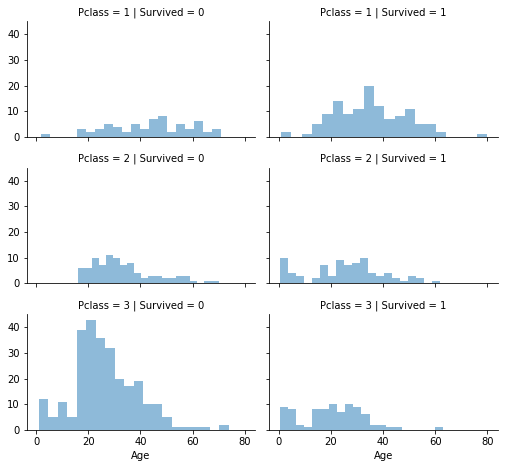

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Plot di atas mengkonfirmasi asumsi kami tentang **pclass 1**, tetapi kami juga dapat melihat kemungkinan besar bahwa seseorang di **pclass 3** tidak akan bertahan.

# 4. SibSp and Parch

**SibSp** dan **Parch** akan lebih masuk akal sebagai fitur gabungan, yang menunjukkan jumlah total kerabat yang dimiliki seseorang di Titanic. Saya akan membuatnya di bawah ini dan juga fitur yang menabur jika seseorang tidak sendirian.

In [18]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64